In [1]:
# pip install mne
import numpy as np
import mne
import pandas as pd
import scipy
from matplotlib import pyplot as plt 
import xml.etree.cElementTree as et

# Data Cleaning

In [ ]:
# def samp_down(df,samp_rate,user,file_num):
    
#     for column in df.columns:
#         if samp_rate[column]==200:
#             test = scipy.signal.decimate(df[column],10)
#             test= scipy.signal.decimate(test,24)
#         elif samp_rate[column]==10:
#             test = scipy.signal.decimate(df[column],50)
#             test= scipy.signal.decimate(test,96)
#         elif samp_rate[column]==500:
#             test = scipy.signal.decimate(df[column],16)
#              test= scipy.signal.decimate(test,6)
#         elif samp_rate[column]==100:
#             test = scipy.signal.decimate(df[column],48)
#             test= scipy.signal.decimate(test,10)
#         else:
#             test = scipy.signal.decimate(df[column],50)
#             test = scipy.signal.decimate(test,20)
#             test= scipy.signal.decimate(test,48)
            
            

In [2]:
def clean_data_average(user,file_num=5):
    
    
    for file in range(1,file_num+1):
        file_name = '0000'+user+'-100507'+'[00'+str(file)+'].edf'
        edf = mne.io.read_raw_edf(file_name)
        df = pd.DataFrame(data=edf.get_data().T,columns=edf.ch_names)
        size = len(df)
        
        samp_down_200= df[['EEG A1-A2','EEG C3-A2','EEG C4-A1','EOG LOC-A2','EOG ROC-A2','EMG Chin','Leg 1','Leg 2','ECG I']].groupby(np.arange(size)//(48000/200)).mean()
        samp_down_10= df['RR'].groupby(np.arange(size)//(48000/10)).mean()
        samp_down_500= df['Snore'].groupby(np.arange(size)//(48000/500)).mean()
        samp_down_100= df[['Flow Patient-0','Flow Patient-1','Effort THO','Effort ABD']].groupby(np.arange(size)//(48000/100)).mean()
        samp_down_1= df[['SpO2','Body']].groupby(np.arange(size)//(48000/1)).mean()
        
        if file==1:
            for key in samp_down_200.columns:
                samp_down_200[key].to_csv(user+"_"+key+'.csv',index=False)
                
            samp_down_10.to_csv(user+"_"+samp_down_10.name+'.csv',index=False)
            samp_down_500.to_csv(user+"_"+samp_down_500.name+'.csv',index=False)
            
            for key in samp_down_100.columns:
                samp_down_100[key].to_csv(user+"_"+key+'.csv',index=False)
             
            for key in samp_down_1.columns:
                samp_down_1[key].to_csv(user+"_"+key+'.csv',index=False)
                
        else:
            for key in samp_down_200.columns:
                samp_down_200[key].to_csv(user+"_"+key+'.csv', mode='a', index=False, header=False)
            samp_down_10.to_csv(user+"_"+samp_down_10.name+'.csv', mode='a', index=False, header=False)
            samp_down_500.to_csv(user+"_"+samp_down_500.name+'.csv', mode='a', index=False, header=False)
            for key in samp_down_100.columns:
                samp_down_100[key].to_csv(user+"_"+key+'.csv', mode='a', index=False, header=False)
            for key in samp_down_1.columns:
                samp_down_1[key].to_csv(user+"_"+key+'.csv', mode='a', index=False, header=False)

In [8]:
pat_list = ["0995","0999","1000","1006","1008","1010","1014","1016","1018","1020",\
            "1022","1024","1026","1028","1037","1039","1041","1043","1045","1057",\
            "1059","1069","1071","1073","1082","1084","1086","1088","1089","1093",\
            "1095","1097","1104","1106","1108","1110","1112","1116","1118","1120",\
            "1122","1127","1129","1131","1135","1137","1139","1143","1145","1147"]
file_num = [5,5,5,4,5,4,4,7,5,5,\
            5,5,4,7,4,4,5,5,5,4,\
            4,5,5,5,5,7,5,5,5,5,\
            5,6,5,4,5,5,6,5,4,5,\
            4,5,5,4,3,5,5,5,5,7]

zipped_list = zip(pat_list[5:],file_num[5:])
for pat,file in zipped_list:
    print(pat,file)

1010 4
1014 4
1016 7
1018 5
1020 5
1022 5
1024 5
1026 4
1028 7
1037 4
1039 4
1041 5
1043 5
1045 5
1057 4
1059 4
1069 5
1071 5
1073 5
1082 5
1084 7
1086 5
1088 5
1089 5
1093 5
1095 5
1097 6
1104 5
1106 4
1108 5
1110 5
1112 6
1116 5
1118 4
1120 5
1122 4
1127 5
1129 5
1131 4
1135 3
1137 5
1139 5
1143 5
1145 5
1147 7


In [3]:
# %reset array
for pat,file in zipped_list
clean_data_average('00001008-100507',5)

Extracting EDF parameters from C:\Users\rafae\Downloads\00001008-100507[001].edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\rafae\AppData\Local\Temp\ipykernel_2392\3252294574.py:6: RuntimeWarning: Channel names are not unique, found duplicates for: {'Flow Patient'}. Applying running numbers for duplicates.
  edf = mne.io.read_raw_edf(file_name)


Extracting EDF parameters from C:\Users\rafae\Downloads\00001008-100507[002].edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\rafae\AppData\Local\Temp\ipykernel_2392\3252294574.py:6: RuntimeWarning: Channel names are not unique, found duplicates for: {'Flow Patient'}. Applying running numbers for duplicates.
  edf = mne.io.read_raw_edf(file_name)


Extracting EDF parameters from C:\Users\rafae\Downloads\00001008-100507[003].edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\rafae\AppData\Local\Temp\ipykernel_2392\3252294574.py:6: RuntimeWarning: Channel names are not unique, found duplicates for: {'Flow Patient'}. Applying running numbers for duplicates.
  edf = mne.io.read_raw_edf(file_name)


Extracting EDF parameters from C:\Users\rafae\Downloads\00001008-100507[004].edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\rafae\AppData\Local\Temp\ipykernel_2392\3252294574.py:6: RuntimeWarning: Channel names are not unique, found duplicates for: {'Flow Patient'}. Applying running numbers for duplicates.
  edf = mne.io.read_raw_edf(file_name)


Extracting EDF parameters from C:\Users\rafae\Downloads\00001008-100507[005].edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\rafae\AppData\Local\Temp\ipykernel_2392\3252294574.py:6: RuntimeWarning: Channel names are not unique, found duplicates for: {'Flow Patient'}. Applying running numbers for duplicates.
  edf = mne.io.read_raw_edf(file_name)


In [59]:
edf_list = ['00000995-100507[001].edf','00000995-100507[002].edf','00000995-100507[003].edf','00000995-100507[004].edf','00000995-100507[005].edf']
samp_rate = {
'EEG A1-A2':200,
'EEG C3-A2':200,
'EEG C4-A1':200,
'EOG LOC-A2':200,
'EOG ROC-A2':200,
'EMG Chin':200,
'Leg 1':200,
'Leg 2':200,
'ECG I':200,
'RR':10,
'Snore':500,
'Flow Patient-0':100,
'Flow Patient-1':100,
'Effort THO':100,
'Effort ABD':100,
'SpO2':1,
'Body':1,
'PulseRate':1}
# 'Mic':48000,
# 'Tracheal':48000}

final_df = pd.DataFrame()
edf0 = mne.io.read_raw_edf(edf_list[0])
# header = ','.join(edf0.ch_names)
df_edf0 = pd.DataFrame(data=edf0.get_data().T,columns=edf0.ch_names)
edf1 = mne.io.read_raw_edf(edf_list[1])
# df_edf1 = pd.DataFrame(data=edf1.get_data().T,columns=edf0.ch_names)
edf2 = mne.io.read_raw_edf(edf_list[2])
# df_edf2 = pd.DataFrame(data=edf2.get_data().T,columns=edf0.ch_names)
edf3 = mne.io.read_raw_edf(edf_list[3])
# df_edf3 = pd.DataFrame(data=edf3.get_data().T,columns=edf0.ch_names)
edf4 = mne.io.read_raw_edf(edf_list[4])
# df_edf4 = pd.DataFrame(data=edf4.get_data().T,columns=edf0.ch_names)

Extracting EDF parameters from C:\Users\rafae\Downloads\00000995-100507[001].edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\rafae\AppData\Local\Temp\ipykernel_14620\2615374658.py:25: RuntimeWarning: Channel names are not unique, found duplicates for: {'Flow Patient'}. Applying running numbers for duplicates.
  edf0 = mne.io.read_raw_edf(edf_list[0])


Extracting EDF parameters from C:\Users\rafae\Downloads\00000995-100507[002].edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\rafae\AppData\Local\Temp\ipykernel_14620\2615374658.py:28: RuntimeWarning: Channel names are not unique, found duplicates for: {'Flow Patient'}. Applying running numbers for duplicates.
  edf1 = mne.io.read_raw_edf(edf_list[1])


Extracting EDF parameters from C:\Users\rafae\Downloads\00000995-100507[003].edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\rafae\AppData\Local\Temp\ipykernel_14620\2615374658.py:30: RuntimeWarning: Channel names are not unique, found duplicates for: {'Flow Patient'}. Applying running numbers for duplicates.
  edf2 = mne.io.read_raw_edf(edf_list[2])


Extracting EDF parameters from C:\Users\rafae\Downloads\00000995-100507[004].edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\rafae\AppData\Local\Temp\ipykernel_14620\2615374658.py:32: RuntimeWarning: Channel names are not unique, found duplicates for: {'Flow Patient'}. Applying running numbers for duplicates.
  edf3 = mne.io.read_raw_edf(edf_list[3])


Extracting EDF parameters from C:\Users\rafae\Downloads\00000995-100507[005].edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\rafae\AppData\Local\Temp\ipykernel_14620\2615374658.py:34: RuntimeWarning: Channel names are not unique, found duplicates for: {'Flow Patient'}. Applying running numbers for duplicates.
  edf4 = mne.io.read_raw_edf(edf_list[4])


In [4]:
edf0.ch_names

['EEG A1-A2',
 'EEG C3-A2',
 'EEG C4-A1',
 'EOG LOC-A2',
 'EOG ROC-A2',
 'EMG Chin',
 'Leg 1',
 'Leg 2',
 'ECG I',
 'RR',
 'Snore',
 'Flow Patient-0',
 'Flow Patient-1',
 'Effort THO',
 'Effort ABD',
 'SpO2',
 'Body',
 'PulseRate',
 'Mic',
 'Tracheal']

In [66]:
column = "Flow Patient-0"
freq = samp_rate[column]

In [75]:
test = scipy.signal.decimate(df_edf0[column],48)
test = scipy.signal.decimate(test,10)
# test= scipy.signal.decimate(test,20)

In [79]:
size0 = len(df_edf0)
smalledf0= df_edf0[column].groupby(np.arange(size0)//(48000/freq)).mean()

In [83]:
smalledf0.name

'Flow Patient-0'

In [80]:
xnew = np.linspace(0, 3600*freq, size0, endpoint=False)

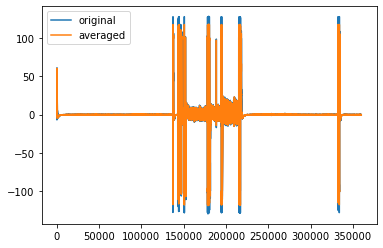

In [81]:
plt.plot(xnew,df_edf0[column])
plt.plot(smalledf0)

plt.legend(['original', 'averaged'], loc='best')

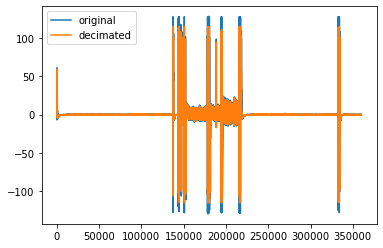

In [82]:
plt.plot(xnew,df_edf0[column])
plt.plot(test)

plt.legend(['original', 'decimated'], loc='best')

# Events cleaning

In [12]:
annotations =et.parse("00000995-100507 (1).rml").getroot()

In [38]:
annotations[5][1][11].attrib

In [44]:
events = []
for event in annotations.iter('{http://www.respironics.com/PatientStudy.xsd}Event'):
    events.append(event.attrib)

In [46]:
events_df= pd.DataFrame(events)

In [57]:
events_df[events_df.Family!="User"].reset_index(drop=True)

,Family,Type,Start,Duration,Machine,OriginatedOnDevice
0,Cardiac,PttDrop,466,13,true,NaN
1,Neuro,Arousal,581.5,4,NaN,NaN
2,Cardiac,PttDrop,583,13,true,NaN
3,Cardiac,PttDrop,857,12,true,NaN
4,Cardiac,Tachycardia,872,21,true,NaN
...,...,...,...,...,...,...
982,SpO2,RelativeDesaturation,17740,5,true,NaN
983,Respiratory,Hypopnea,17820.5,11.5,NaN,NaN
984,Cardiac,PttDrop,17837,13,true,NaN
985,Neuro,Arousal,17842.5,4.5,NaN,NaN


# Random tests

In [50]:
import pandas as pd
import numpy as np

In [13]:
pip install librosa

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\rafae\\anaconda3\\Lib\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3


In [15]:
import librosa
import matplotlib.pyplot as plt

In [5]:
snore = pd.read_csv('00001006-100507_Snore.csv')

In [6]:
500*10

5000

In [7]:
snore.shape

(5400000, 1)

<AxesSubplot:>

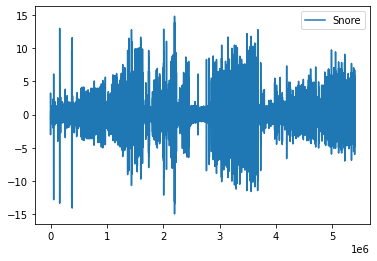

In [8]:
snore.plot()

<AxesSubplot:>

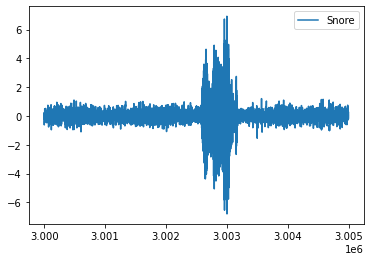

In [9]:
snore[3000000:3000000 +5000].plot()

In [10]:

sliced = snore[3000000:3000000 +5000].to_numpy().reshape(5000,)
sliced.shape


(5000,)

In [16]:
y, sr = librosa.load(librosa.ex('libri1'))
librosa.feature.mfcc(y=y, sr=sr)


SystemError: initialization of _internal failed without raising an exception

In [23]:
# raw_downsampled = edf0.copy().resample(sfreq=200)

# for data, title in zip([edf0, raw_downsampled], ["Original", "Downsampled"]):
#     fig = data.compute_psd().plot(average=True, picks="data", exclude="bads")
#     fig.subplots_adjust(top=0.9)
#     fig.suptitle(title)
#     plt.setp(fig.axes, xlim=(0, 300))

In [11]:
mfccs = librosa.feature.mfcc(y=sliced,n_mfcc =13,sr=500)
delta = librosa.feature.delta(mfccs)
delta2 = librosa.feature.delta(mfccs,order=2)

SystemError: initialization of _internal failed without raising an exception

In [45]:
mfccs.shape

(13, 10)

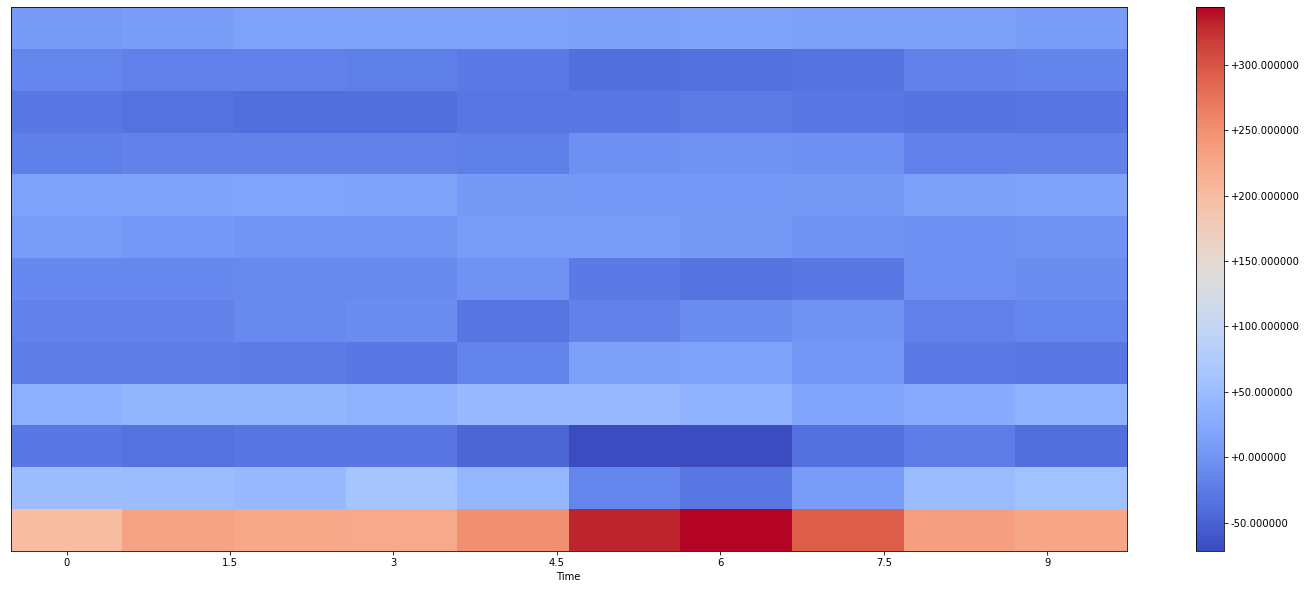

In [44]:
plt.figure(figsize=(25,10))
librosa.display.specshow(mfccs,x_axis='time',sr=500)
plt.colorbar(format='%+2f')
plt.show()

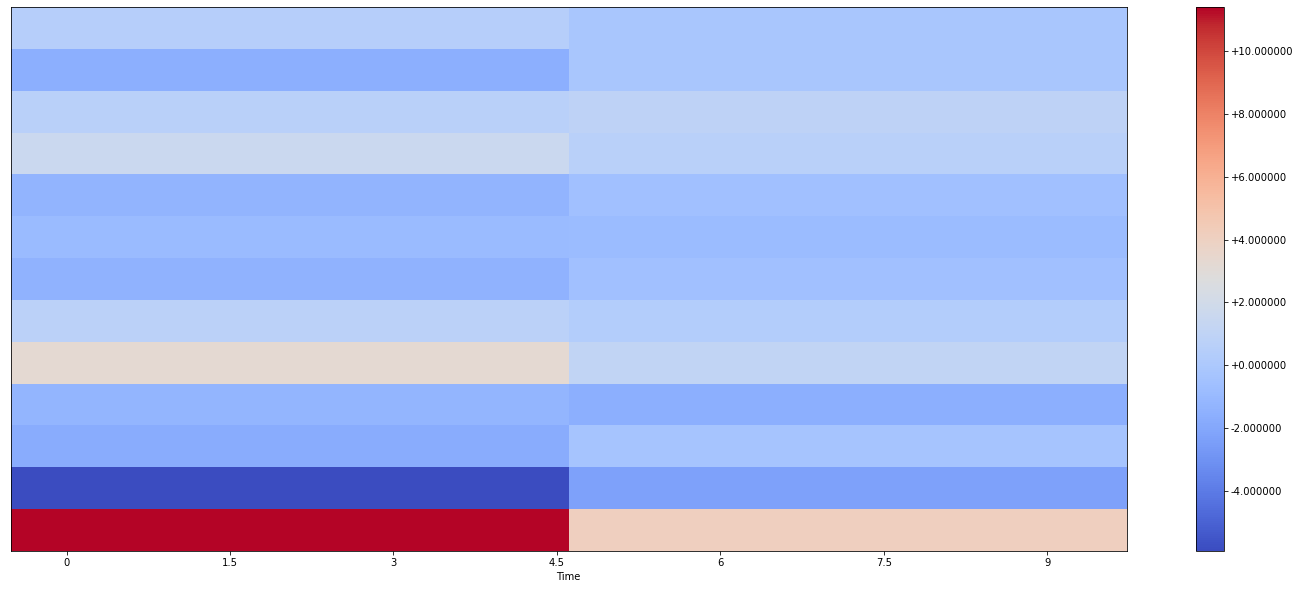

In [47]:
plt.figure(figsize=(25,10))
librosa.display.specshow(delta,x_axis='time',sr=500)
plt.colorbar(format='%+2f')
plt.show()

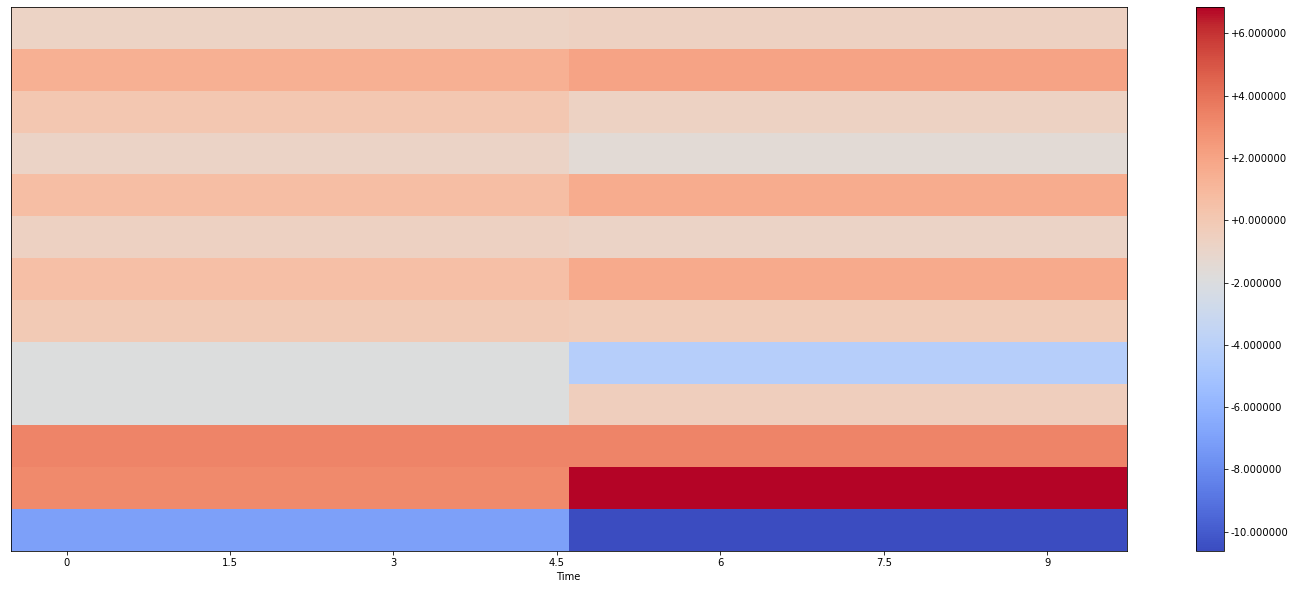

In [48]:
plt.figure(figsize=(25,10))
librosa.display.specshow(delta2,x_axis='time',sr=500)
plt.colorbar(format='%+2f')

In [51]:
mfccs_concat = np.concatenate((mfccs,delta,delta2))
mfccs_concat.shape

(39, 10)

## handling flowrate

In [53]:
from scipy import signal

In [84]:
flow = pd.read_csv('00000999-100507_Flow Patient-1.csv')
flow.shape

(1490100, 1)

<AxesSubplot:>

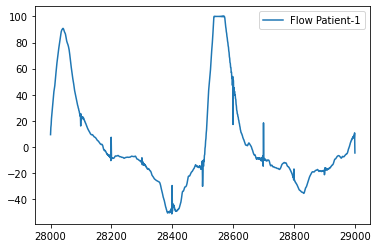

In [114]:
x=28
i=1000

flow[i*x:i*x+1000].plot()

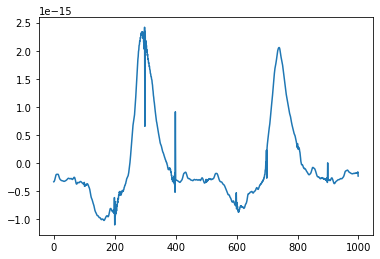

In [107]:
sos = signal.butter(10,0.7,'lp',fs=100,output='sos')
filtered=signal.sosfilt(sos,flow)
plt.plot(filtered[i*x:i*x+1000])

In [5]:
smalledf0=df_edf0.groupby(np.arange(size0)//(48000/200)).mean()

In [41]:
df_edf0["EEG A1-A2"][0:100]

0     4.776074e-09
1    -2.898873e-08
2    -6.236462e-08
3    -9.535097e-08
4    -1.279472e-07
          ...     
95   -1.514823e-06
96   -1.514548e-06
97   -1.513998e-06
98   -1.513176e-06
99   -1.512085e-06
Name: EEG A1-A2, Length: 100, dtype: float64

In [1]:

# Reurn multiple columns from apply()
def samp_down(column):
   column =  scipy.signal.decimate(column,10)
   return column
df = df.apply(samp_down,axis=1)
print(df)

NameError: name 'df' is not defined

In [56]:
test[0:100]

array([-1.57438653e-08, -3.72552688e-07,  2.57679248e-07, -1.26119844e-07,
        4.65809225e-08,  2.34916948e-08, -4.66178528e-08,  6.47043718e-08,
       -4.84341665e-08,  4.29279043e-08, -1.48737158e-08,  6.11604911e-09,
        1.66018357e-08, -1.38991308e-08,  2.33865057e-08, -9.60708539e-09,
        1.23905322e-08,  3.34260931e-09,  1.26069831e-09,  1.05098746e-08,
       -1.44000891e-09,  9.47475835e-09,  1.93244098e-09,  5.28960056e-09,
        5.68046027e-09,  2.74119797e-09,  6.78702319e-09,  2.89936092e-09,
        5.79030491e-09,  4.23719194e-09,  4.53908774e-09,  5.12492031e-09,
        4.12077525e-09,  5.11212570e-09,  4.43489458e-09,  4.65978357e-09,
        4.87740216e-09,  4.33018697e-09,  5.04633383e-09,  4.31927874e-09,
        4.93794222e-09,  4.48985043e-09,  4.76493896e-09,  4.61472413e-09,
        4.72201738e-09,  4.56256137e-09,  4.86035355e-09,  4.36821110e-09,
        5.06241611e-09,  4.21828303e-09,  5.10033922e-09,  4.33662168e-09,
        4.81510285e-09,  

In [95]:
xnew = np.linspace(0, 720000, size0, endpoint=False)

In [64]:
xnew.size

172800000

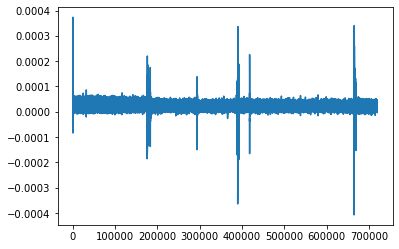

In [65]:
plt.plot(xnew,df_edf0["EEG A1-A2"])

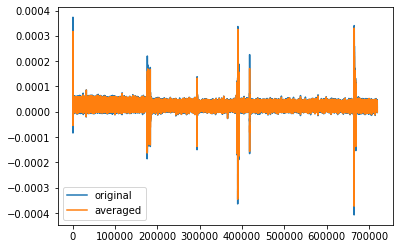

In [13]:

plt.plot(xnew,df_edf0["EEG A1-A2"])
plt.plot(smalledf0["EEG A1-A2"])

plt.legend(['original', 'averaged'], loc='best')

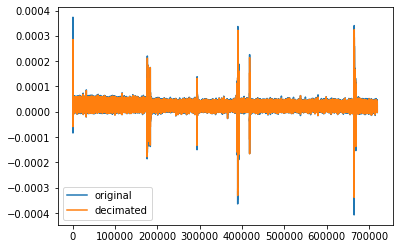

In [14]:
plt.plot(xnew,df_edf0["EEG A1-A2"])
plt.plot(test)

plt.legend(['original', 'decimated'], loc='best')

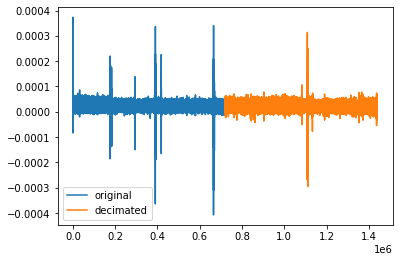

In [97]:
plt.plot(xnew,df_edf0["EEG A1-A2"])
plt.plot(df["EEG A1-A2"][720001:1440000])

plt.legend(['original', 'decimated'], loc='best')

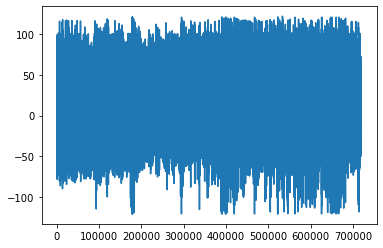

In [30]:
plt.plot(smalledf0["Flow Patient-1"])

In [26]:
df_edf0.astype(float).describe()

,EEG A1-A2,EEG C3-A2,EEG C4-A1,EOG LOC-A2,EOG ROC-A2,EMG Chin,Leg 1,Leg 2,ECG I,RR,Snore,Flow Patient-0,Flow Patient-1,Effort THO,Effort ABD,SpO2,Body,PulseRate,Mic,Tracheal
count,1.728000e+08,1.728000e+08,1.728000e+08,1.728000e+08,1.728000e+08,1.728000e+08,1.728000e+08,1.728000e+08,1.728000e+08,1.728000e+08,1.728000e+08,1.728000e+08,1.728000e+08,1.728000e+08,1.728000e+08,1.728000e+08,1.728000e+08,1.728000e+08,1.728000e+08,1.728000e+08
mean,1.824138e-05,2.486088e-05,2.883455e-05,3.164654e-05,2.454174e-05,-2.129102e-08,-6.601583e-06,1.392864e-07,3.281467e-05,1.871530e+02,5.178424e-03,7.652280e-01,-2.505080e+00,-1.237318e-02,-1.196951e-02,9.256425e+01,5.245000e+00,7.616139e+01,1.519406e-05,1.514224e-05
std,1.334124e-05,1.563362e-05,2.169002e-05,1.680921e-05,2.122663e-05,2.224448e-06,2.842955e-05,2.266121e-05,2.078022e-04,3.800721e+01,3.819191e-01,2.132049e+01,4.660815e+01,3.860465e+00,4.505640e+00,2.887490e+00,1.303831e+00,4.277890e+00,2.033860e-02,2.795302e-03
min,-4.080211e-04,-4.425535e-04,-4.014311e-04,-4.213717e-04,-4.192017e-04,-9.971453e-05,-2.889510e-04,-2.594641e-04,-4.543916e-03,-2.088686e+01,-1.961410e+01,-1.298946e+02,-1.282802e+02,-8.159458e+01,-7.292994e+01,0.000000e+00,0.000000e+00,0.000000e+00,-5.670100e-01,-2.771801e-01
25%,1.334858e-05,1.837293e-05,2.281665e-05,2.476993e-05,1.817172e-05,-1.418653e-06,-1.640995e-05,-3.011141e-06,-3.121613e-06,1.892806e+02,-2.288591e-01,-2.148166e-01,-3.302774e+01,-8.527290e-01,-2.098723e+00,9.200000e+01,3.000000e+00,7.400000e+01,-1.362631e-02,-1.449607e-03
50%,1.768755e-05,2.479672e-05,2.925057e-05,3.153818e-05,2.484457e-05,-2.230181e-08,-1.250663e-06,3.411218e-07,2.075228e-05,1.993169e+02,1.725057e-03,-2.020588e-02,-1.139600e+01,-8.696958e-02,-3.479763e-01,9.260000e+01,6.000000e+00,7.600000e+01,-1.068132e-04,1.525902e-05
75%,2.241366e-05,3.130779e-05,3.549310e-05,3.845023e-05,3.143166e-05,1.372896e-06,5.379553e-06,3.721691e-06,5.181299e-05,2.031158e+02,2.355623e-01,1.114779e-01,2.274798e+01,9.589408e-01,2.105879e+00,9.320000e+01,6.000000e+00,7.800000e+01,1.353475e-02,1.480125e-03
max,3.735803e-04,3.827660e-04,4.015799e-04,4.572299e-04,3.912246e-04,1.013354e-04,3.017176e-04,2.675423e-04,4.640532e-03,2.738147e+02,3.539380e+01,1.287583e+02,1.313032e+02,1.001113e+02,9.245295e+01,9.810000e+01,6.000000e+00,1.000000e+02,8.145113e-01,3.024796e-01


In [24]:
smalledf0.describe()

,EEG A1-A2,EEG C3-A2,EEG C4-A1,EOG LOC-A2,EOG ROC-A2,EMG Chin,Leg 1,Leg 2,ECG I,RR,Snore,Flow Patient-0,Flow Patient-1,Effort THO,Effort ABD,SpO2,Body,PulseRate,Mic,Tracheal
count,720000.000000,720000.000000,720000.000000,720000.000000,720000.000000,7.200000e+05,7.200000e+05,7.200000e+05,720000.000000,720000.000000,720000.000000,720000.000000,720000.000000,720000.000000,720000.000000,720000.000000,720000.000000,720000.000000,720000.000000,720000.000000
mean,0.000018,0.000025,0.000029,0.000032,0.000025,-2.129102e-08,-6.601583e-06,1.392864e-07,0.000033,187.153000,0.005178,0.765228,-2.505080,-0.012373,-0.011970,92.564250,5.245000,76.161389,0.000015,0.000015
std,0.000013,0.000015,0.000022,0.000017,0.000021,1.956019e-06,1.172560e-05,1.591495e-05,0.000208,37.993780,0.244246,21.316108,46.587976,3.859656,4.504629,2.887492,1.303832,4.277893,0.019166,0.001248
min,-0.000373,-0.000387,-0.000369,-0.000381,-0.000365,-9.179088e-05,-2.133135e-04,-1.942522e-04,-0.004460,-20.829585,-6.158104,-121.527399,-120.462107,-78.041516,-72.912352,0.000000,0.000000,0.000000,-0.412964,-0.024968
25%,0.000014,0.000019,0.000023,0.000025,0.000018,-1.245049e-06,-1.480181e-05,-2.746596e-06,-0.000003,189.246007,-0.150699,-0.214654,-33.008272,-0.852232,-2.098006,92.000000,3.000000,74.000000,-0.012809,-0.001101
50%,0.000018,0.000025,0.000029,0.000032,0.000025,-2.256133e-08,-5.263741e-06,2.687780e-07,0.000021,199.281044,0.003513,-0.020329,-11.397727,-0.087181,-0.348537,92.600000,6.000000,76.000000,-0.000095,0.000026
75%,0.000022,0.000031,0.000035,0.000038,0.000031,1.199322e-06,6.420230e-08,3.214330e-06,0.000052,203.109084,0.159677,0.111478,22.737655,0.958747,2.105547,93.200000,6.000000,78.000000,0.012725,0.001135
max,0.000331,0.000321,0.000369,0.000408,0.000363,9.285565e-05,2.214566e-04,1.996087e-04,0.004233,273.720351,11.402148,120.871524,121.691301,100.083740,92.444501,98.100000,6.000000,100.000000,0.607537,0.031253


In [14]:
# import json
# with open('data.json', 'w') as f:
#     json.dump(array_dict, f)

In [12]:
df2=final_df.groupby(np.arange(len(final_df))//480).mean()

In [10]:
np.savetxt("output.txt", array_dict)

ValueError: Expected 1D or 2D array, got 0D array instead

In [14]:
df2.to_csv('output.csv',index=False)
# df.to_csv('existing.csv', mode='a', index=False, header=False)

In [ ]:
for file in edf_list:
    edf = mne.io.read_raw_edf(file)
    header = ','.join(edf.ch_names)
    df_edf = pd.DataFrame(data=edf.get_data().T,columns=edf.ch_names)
    final_df = pd.concat([final_df,df_edf])
# np.savetxt('test.csv', edf.get_data().T, delimiter=',', header=header)

Extracting EDF parameters from C:\Users\rafae\Downloads\00000995-100507[001].edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\rafae\AppData\Local\Temp\ipykernel_21192\2782426395.py:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'Flow Patient'}. Applying running numbers for duplicates.
  edf = mne.io.read_raw_edf(file)


In [3]:
edf = mne.io.read_raw_edf('00000999-100507[005].edf')
edf.ch_names

Extracting EDF parameters from C:\Users\rafae\Downloads\00000999-100507[005].edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\rafae\AppData\Local\Temp\ipykernel_22164\471509404.py:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'Flow Patient'}. Applying running numbers for duplicates.
  edf = mne.io.read_raw_edf('00000999-100507[005].edf')


['EEG A1-A2',
 'EEG C3-A2',
 'EEG C4-A1',
 'EOG LOC-A2',
 'EOG ROC-A2',
 'EMG Chin',
 'Leg 1',
 'Leg 2',
 'ECG I',
 'RR',
 'Snore',
 'Flow Patient-0',
 'Flow Patient-1',
 'Effort THO',
 'Effort ABD',
 'SpO2',
 'Body',
 'PulseRate',
 'Mic',
 'Tracheal']

In [4]:

df = pd.DataFrame(data=edf.get_data().T,columns=edf.ch_names)

In [5]:
df.shape

(24048000, 20)

In [14]:
df.shape
df2=df.groupby(np.arange(len(df))//200).mean()

In [15]:
df2.to_csv('output.csv',index=False)

In [12]:
df2.shape


(24048, 20)

<AxesSubplot:>

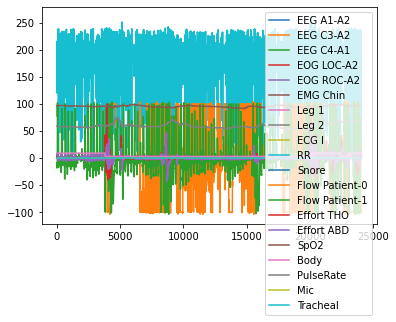

In [13]:
df2.plot()


In [ ]:
df[48001:96000].describe()

In [13]:
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.datasets.sleep_physionet.age import fetch_data

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

Using default location ~/mne_data for PHYSIONET_SLEEP...
Creating ~/mne_data


100%|#############################################| 48.3M/48.3M [00:00<?, ?B/s]
100%|#############################################| 4.62k/4.62k [00:00<?, ?B/s]
100%|#####################################| 51.1M/51.1M [00:00<00:00, 46.4GB/s]
100%|#####################################| 3.90k/3.90k [00:00<00:00, 1.95MB/s]

Download complete in 03m31s (94.8 MB)
Extracting EDF parameters from C:\Users\rafae\mne_data\physionet-sleep-data\SC4001E0-PSG.edf...
EDF file detected
Channel 'EEG Fpz-Cz' recognized as type EEG (renamed to 'Fpz-Cz').
Channel 'EEG Pz-Oz' recognized as type EEG (renamed to 'Pz-Oz').
Channel 'EOG horizontal' recognized as type EOG (renamed to 'horizontal').
Channel 'Resp oro-nasal' recognized as type RESP (renamed to 'oro-nasal').
Channel 'EMG submental' recognized as type EMG (renamed to 'submental').
Channel 'Temp rectal' recognized as type TEMP (renamed to 'rectal').
Setting channel info structure...
Creating raw.info structure...


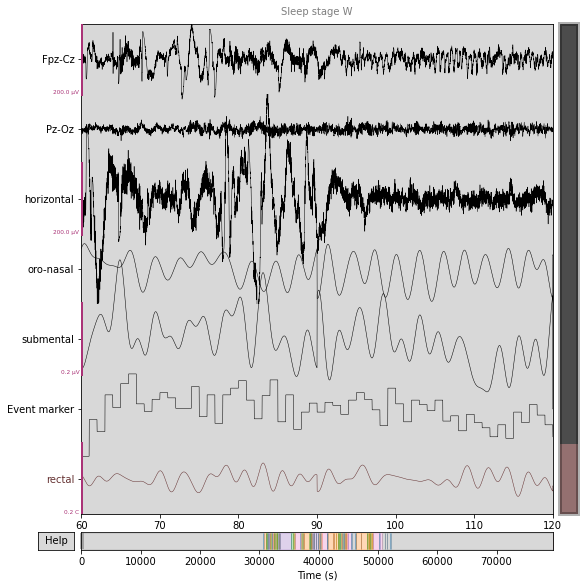

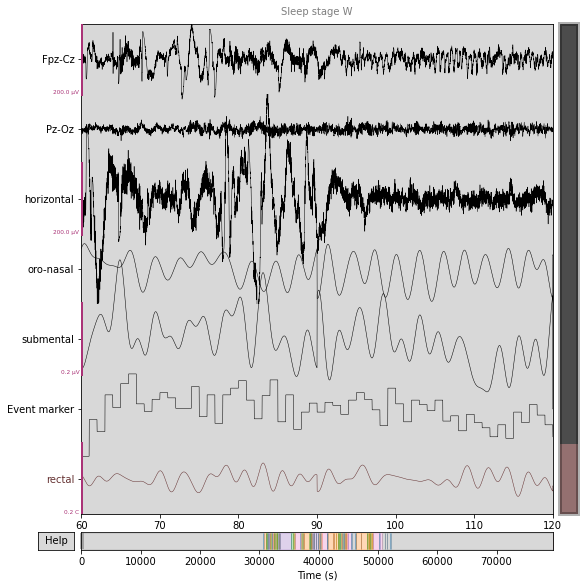

In [14]:
ALICE, BOB = 0, 1

[alice_files, bob_files] = fetch_data(subjects=[ALICE, BOB], recording=[1])

raw_train = mne.io.read_raw_edf(
    alice_files[0], stim_channel="Event marker", infer_types=True
)
annot_train = mne.read_annotations(alice_files[1])

raw_train.set_annotations(annot_train, emit_warning=False)

# plot some data
# scalings were chosen manually to allow for simultaneous visualization of
# different channel types in this specific dataset
raw_train.plot(
    start=60,
    duration=60,
    scalings=dict(eeg=1e-4, resp=1e3, eog=1e-4, emg=1e-7, misc=1e-1),
)

Extracting EDF parameters from C:\Users\rafae\mne_data\physionet-sleep-data\SC4001EC-Hypnogram.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\rafae\AppData\Local\Temp\ipykernel_10048\1414350739.py:1: RuntimeWarning: Header information is incorrect for record length. Default record length set to 1.
It is possible that this file only contains annotations and no signals. In that case, please use mne.read_annotations() to load these annotations.
  mne.io.read_raw_edf(alice_files[1])
C:\Users\rafae\AppData\Local\Temp\ipykernel_10048\1414350739.py:1: RuntimeWarning: Omitted 153 annotation(s) that were outside data range.
  mne.io.read_raw_edf(alice_files[1])
C:\Users\rafae\AppData\Local\Temp\ipykernel_10048\1414350739.py:1: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  mne.io.read_raw_edf(alice_files[1])


<RawEDF | SC4001EC-Hypnogram.edf, 0 x 2054 (1.0 s), ~5 kB, data not loaded>

In [50]:
annot_train[1]

OrderedDict([('onset', 30630.0),
             ('duration', 120.0),
             ('description', 'Sleep stage 1'),
             ('orig_time', None)])

In [61]:
annot_train=annot_train.append(onset= 30630.0,
             duration=120.0,
             description= 'Sleep stage 2')

In [68]:
annot_train[3]

OrderedDict([('onset', 30630.0),
             ('duration', 120.0),
             ('description', 'Sleep stage 2'),
             ('orig_time', None)])

In [69]:
annotation_desc_2_event_id = {
    "Sleep stage W": 1,
    "Sleep stage 1": 2,
    "Sleep stage 2": 3,
    "Sleep stage 3": 4,
    "Sleep stage 4": 4,
    "Sleep stage R": 5,
}

# keep last 30-min wake events before sleep and first 30-min wake events after
# sleep and redefine annotations on raw data
annot_train.crop(annot_train[1]["onset"] - 30 * 60, annot_train[-2]["onset"] + 30 * 60)
raw_train.set_annotations(annot_train, emit_warning=False)

events_train, _ = mne.events_from_annotations(
    raw_train, event_id=annotation_desc_2_event_id, chunk_duration=30.0
)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


In [73]:
events_train[0:200]

array([[2883000,       0,       1],
       [2886000,       0,       1],
       [2889000,       0,       1],
       [2892000,       0,       1],
       [2895000,       0,       1],
       [2898000,       0,       1],
       [2901000,       0,       1],
       [2904000,       0,       1],
       [2907000,       0,       1],
       [2910000,       0,       1],
       [2913000,       0,       1],
       [2916000,       0,       1],
       [2919000,       0,       1],
       [2922000,       0,       1],
       [2925000,       0,       1],
       [2928000,       0,       1],
       [2931000,       0,       1],
       [2934000,       0,       1],
       [2937000,       0,       1],
       [2940000,       0,       1],
       [2943000,       0,       1],
       [2946000,       0,       1],
       [2949000,       0,       1],
       [2952000,       0,       1],
       [2955000,       0,       1],
       [2958000,       0,       1],
       [2961000,       0,       1],
       [2964000,       0,   